##### Segundo mini proyecto regression logistica 


In [68]:
#modulos 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [69]:
df = pd.read_csv("archive\\framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [70]:
#print(df.isna().sum())
df.drop(columns="education",inplace=True) # eliminamos la columna education
df['BPMeds'].fillna(0,inplace=True) # busca las filas donde su columna BPMeds sea NaN, reemplaza los valores nulos por un cero 
mean =round(df['glucose'].mean()) # calcula la media de la columna glucose 
df['glucose'].fillna(mean,inplace=True) # busca los valores nulos en la columna glucose y los remplaza por el valor promedio 
df=df.dropna() # elimina todas las filas que cuenten con algun elemento nulo 
#print(df.isna().sum())
print(df.head())
print(df.tail())

   male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39              0         0.0     0.0                0   
1     0   46              0         0.0     0.0                0   
2     1   48              1        20.0     0.0                0   
3     0   61              1        30.0     0.0                0   
4     0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0  
      male  age  cur

In [71]:
# inializacion de los datos 
y =np.array(df['TenYearCHD']) # definimos la columna TenYearCHD  como la variable dependiente
df.drop(columns='TenYearCHD',inplace=True) # eliminamos esta columna del dataframe
X = np.array(df) # definimos como las variables independientes a las columnas del dataframe 
X_scaled = StandardScaler().fit_transform(X) # escalar los valores de la variables independientes 
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, test_size=0.25) # dividir el dataframe en un grupo de prueba y otro de testeo
print(X_train)

[[ 1.14466932 -1.23334277  1.02148683 ...  0.62145282  1.59252662
  -0.12713725]
 [ 1.14466932  1.22137131 -0.97896514 ...  1.2047986  -1.0667361
   0.17984804]
 [-0.87361475 -0.2982136   1.02148683 ... -0.49376705 -0.56812434
  -0.3902675 ]
 ...
 [ 1.14466932 -0.76577819  1.02148683 ... -0.67269243 -0.06951258
  -0.60954271]
 [-0.87361475 -1.23334277  1.02148683 ...  0.15820765  0.76150702
   0.22370309]
 [-0.87361475  0.40313328 -0.97896514 ... -0.39817677 -1.64844982
  -0.60954271]]


In [72]:
# crear el modelo
model = LogisticRegression()
# entrenar el modelo 
model.fit(X_train,y_train)
# utilizarlo para predecir los valores de y_test
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)*100


84.63768115942028

<Figure size 800x600 with 0 Axes>

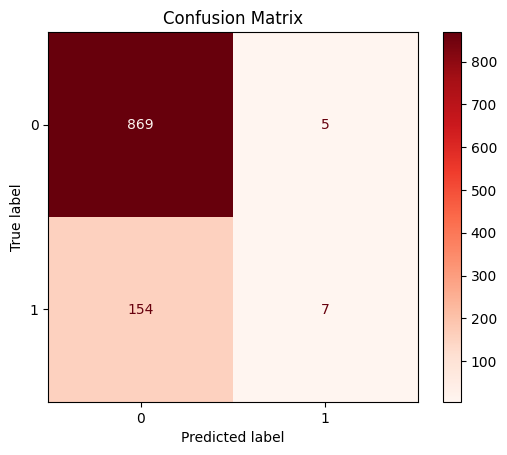

In [75]:
# Matriz de Confusion  
conf_matrix =confusion_matrix(y_test, y_pred) # Calculo de la matriz de confusión  
disp=ConfusionMatrixDisplay(conf_matrix, display_labels =['0','1']) # definicion matriz de confusion 

# Grafica de la matriz de confusion 
plt.figure(figsize=(8,6)) 
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()